# QuTiP basics

- Representation of quantum operators
- Composite systems
- Visualization
- Gotchas
- Task 1: Jaynes–Cummings Hamiltonian


## Required packages

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy
import qutip

In [2]:
import matplotlib
matplotlib.rcParams.update({'figure.figsize': (6, 2.5), 'font.size': 14})

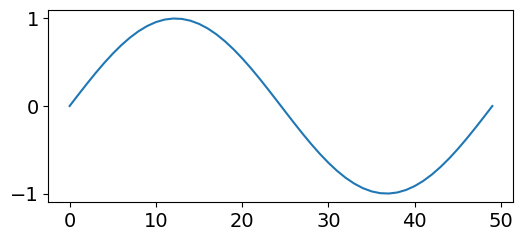

In [3]:
x = np.linspace(0, 2*np.pi)
plt.plot(np.sin(x));

## Representation of quantum operators

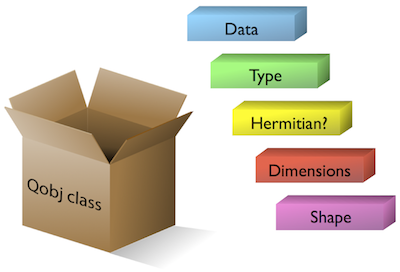

In [4]:
from IPython.display import Image
Image(filename='images/qobj.png')

In [5]:
state = qutip.Qobj([[1], [0]])
state

Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[1.]
 [0.]]

In [6]:
print(state.dims)
print(state.shape)
print(state.type)

[[2], [1]]
(2, 1)
ket


In [7]:
sy = qutip.Qobj([[0,-1.j], [1.j,0]])
sy

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[0.+0.j 0.-1.j]
 [0.+1.j 0.+0.j]]

In [8]:
sz = qutip.Qobj([[1,0], [0,-1]])
sz

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[ 1.  0.]
 [ 0. -1.]]

In [9]:
# Compute the conjugate transpose!
sy.dag()

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[0.+0.j 0.-1.j]
 [0.+1.j 0.+0.j]]

In [10]:
# Take the trace!
sy.tr()

0.0

In [11]:
# Compute the eigenenergy
H = 1.0 * sz + 0.1 * sy
H.eigenenergies()

array([-1.00498756,  1.00498756])

I can also do this with NumPy and SciPy, what's new?

Predefined states

In [12]:
qutip.sigmax()

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[0. 1.]
 [1. 0.]]

Destroy operator $\sqrt{n} |n-1\rangle\langle n|$

In [13]:
a = qutip.destroy(3)
a

Quantum object: dims = [[3], [3]], shape = (3, 3), type = oper, isherm = False
Qobj data =
[[0.         1.         0.        ]
 [0.         0.         1.41421356]
 [0.         0.         0.        ]]

In [14]:
qutip.basis([2], [1])

Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[0.]
 [1.]]

In [15]:
qutip.num(3)

Quantum object: dims = [[3], [3]], shape = (3, 3), type = oper, isherm = True
Qobj data =
[[0. 0. 0.]
 [0. 1. 0.]
 [0. 0. 2.]]

In [16]:
a.dag() * a

Quantum object: dims = [[3], [3]], shape = (3, 3), type = oper, isherm = True
Qobj data =
[[0. 0. 0.]
 [0. 1. 0.]
 [0. 0. 2.]]

In [17]:
qutip.basis([3],[1]).overlap(qutip.basis([3],[2]))

0j

In [18]:
(qutip.basis([2], [0]) + qutip.basis([2], [1])).unit()

Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[0.70710678]
 [0.70710678]]

In [19]:
qutip.commutator(sz, sy)/2

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = False
Qobj data =
[[0.+0.j 0.-1.j]
 [0.-1.j 0.+0.j]]

## Composite systems

A quantum system composed of several subsystems
- A few qubits
- One resonator and a qubit

And operators acting on them.

$I \bigotimes X$

In [20]:
# Pauli X acting on the second qubit
U = qutip.tensor([qutip.qeye(2), qutip.sigmax()])
U

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]]

$X\bigotimes X$

In [21]:
# XX interaction acting on both qubit
U = qutip.tensor([qutip.sigmax(), qutip.sigmax()])
U

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]]

There is a difference!

In [22]:
state_four_level = qutip.basis(4, 1)
state_four_level

Quantum object: dims = [[4], [1]], shape = (4, 1), type = ket
Qobj data =
[[0.]
 [1.]
 [0.]
 [0.]]

In [23]:
state_two_qubits = qutip.basis([2,2], [0, 1])
state_two_qubits

Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket
Qobj data =
[[0.]
 [1.]
 [0.]
 [0.]]

In [24]:
U * state_two_qubits

Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket
Qobj data =
[[0.]
 [0.]
 [1.]
 [0.]]

In [25]:
# This will raise an error
# U * state_four_level

## Visulization
I want to "see" the state!

### Hinton plot

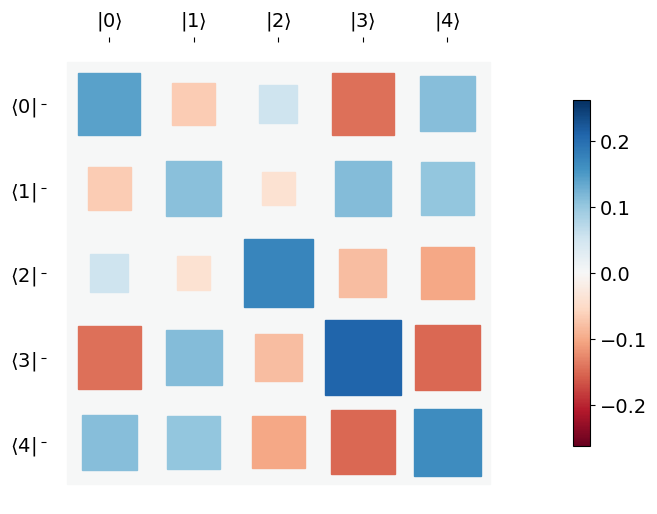

In [26]:
# Random density matrix
rho = qutip.rand_dm(5)
qutip.hinton(rho);

### Wigner function

- Coherent state: $|\alpha\rangle = e^{-|\alpha|^2/2} \sum_0^{\infty} \frac{\alpha^n}{\sqrt{n!}} |n\rangle
$
- Average excitation number $|\alpha|^2$

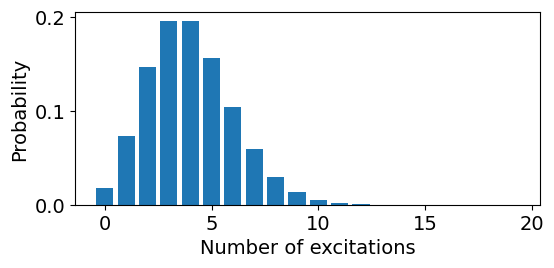

In [27]:
N = 20
coherent_state = qutip.coherent(N, 2)
population = (coherent_state * coherent_state.dag()).diag()
plt.bar(np.arange(0, N), population);
plt.xlabel("Number of excitations")
plt.ylabel("Probability");

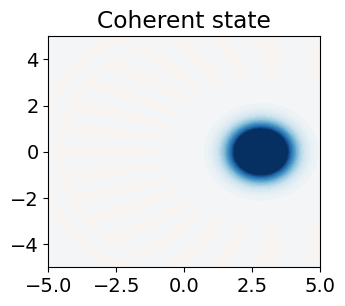

In [28]:

xvec = np.linspace(-5,5,200)
W_coherent = qutip.wigner(coherent_state, xvec, xvec)
fig, axes = plt.subplots(1, 1, figsize=(3.5,3))
axes.contourf(xvec, xvec, W_coherent, 100, norm=matplotlib.colors.Normalize(-.125,.125), cmap="RdBu")
axes.set_title("Coherent state");

$|\alpha\rangle + |-\alpha\rangle$

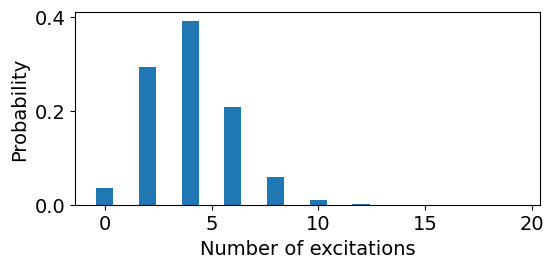

In [29]:
cat_state = (qutip.coherent(N, 2) + qutip.coherent(N, -2)).unit()
population = (cat_state * cat_state.dag()).diag()
plt.bar(np.arange(0, N), population);
plt.xlabel("Number of excitations")
plt.ylabel("Probability");

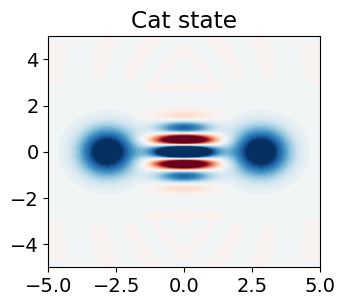

In [30]:
xvec = np.linspace(-5,5,200)
W_coherent = qutip.wigner(cat_state, xvec, xvec)
fig, axes = plt.subplots(1, 1, figsize=(3.5,3))
axes.contourf(xvec, xvec, W_coherent, 100, norm=matplotlib.colors.Normalize(-.125,.125), cmap="RdBu")
axes.set_title("Cat state");

Some fancy state $\frac{1}{3}(|0\rangle + |3\rangle + |9\rangle)$

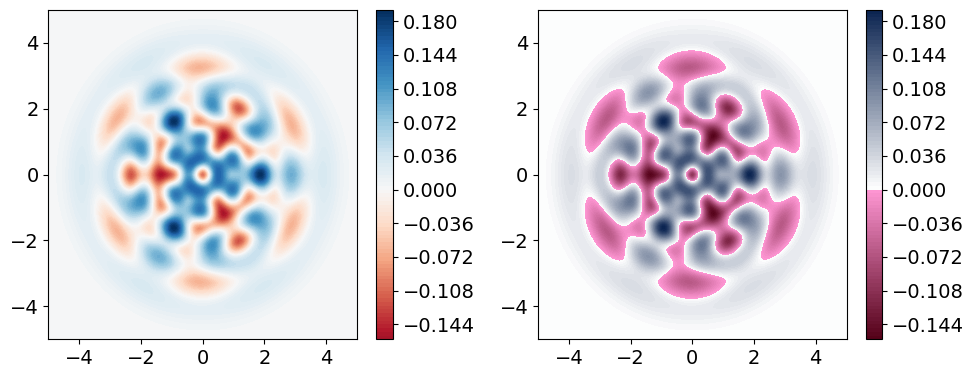

In [31]:
psi = (qutip.basis(10, 0) + qutip.basis(10, 3) + qutip.basis(10, 9)).unit()
xvec = np.linspace(-5, 5, 500)
W = qutip.wigner(psi, xvec, xvec)
wmap = qutip.wigner_cmap(W)  # Generate Wigner colormap
nrm = matplotlib.colors.Normalize(-W.max(), W.max())
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
plt1 = axes[0].contourf(xvec, xvec, W, 100, cmap=matplotlib.cm.RdBu, norm=nrm)
cb1 = fig.colorbar(plt1, ax=axes[0])
plt2 = axes[1].contourf(xvec, xvec, W, 100, cmap=wmap)  # Apply Wigner colormap
cb2 = fig.colorbar(plt2, ax=axes[1])
fig.tight_layout()

## Gotchas

Some common mistakes.

### Difference between qutip and numpy

In [32]:
# This is QuTiP!
qutip.sigmax() * qutip.basis([2], [1])

Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[1.]
 [0.]]

In [33]:
# This is NumPy!
qutip.sigmax().full() @ state.full()

array([[0.+0.j],
       [1.+0.j]])

Do not directly assign a value to Qobj

In [34]:
a = qutip.create(3)
a

Quantum object: dims = [[3], [3]], shape = (3, 3), type = oper, isherm = False
Qobj data =
[[0.         0.         0.        ]
 [1.         0.         0.        ]
 [0.         1.41421356 0.        ]]

In [35]:
a[1,0]

(1+0j)

In [36]:
# Error
# a[1,0] = 2

In [37]:
a_numpy_array = a.full()
a_numpy_array[1,0] = 2
a_numpy_array

array([[0.        +0.j, 0.        +0.j, 0.        +0.j],
       [2.        +0.j, 0.        +0.j, 0.        +0.j],
       [0.        +0.j, 1.41421356+0.j, 0.        +0.j]])

In [38]:
a = qutip.Qobj(a_numpy_array, dims=a.dims)
a

Quantum object: dims = [[3], [3]], shape = (3, 3), type = oper, isherm = False
Qobj data =
[[0.         0.         0.        ]
 [2.         0.         0.        ]
 [0.         1.41421356 0.        ]]

### Automatic rounding
Because we use sparse matrices.

In [39]:
qutip.sigmax() * 1.e-6

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[0.e+00 1.e-06]
 [1.e-06 0.e+00]]

In [40]:
qutip.sigmax() * 1.e-15 * 1.e15

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[0. 0.]
 [0. 0.]]

In [41]:
1.e-15 * 1.e15 * qutip.sigmax()

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[0. 1.]
 [1. 0.]]

Change the settings in `qutip.options`

## Lets try something!

But before that...
where to find help?

- Where to start? How to use ... in QuTiP?
    - Tutorial examples: https://qutip.org/tutorials.html
    - Documentation: https://qutip.org/docs/latest/index.html
- How to solve my perticular problem?
    - Google group: https://groups.google.com/g/qutip
- How to report bugs / ask for features?
    - GitHub: https://github.com/qutip/qutip
- And of course while we are here: ask me :)

### Taks 1.1 The Jaynes-Cumming Hamiltonian.
Define a Jaynes-Cumming Hamiltonian:

$
H=ω_ca^†a+\frac{1}{2}ω_aσ_z+g(a^†+a)(σ^−+σ^+)
$

Hints: 
- Apply `qutip.tensor` with identity operators to define operators that acts on the whole Hilbert space.
- Truncate the cavity operators to a finite level operator.

In [53]:
from qutip import tensor, destroy, create, qeye, sigmaz, sigmax, sigmay, basis
num_level = 15 # resonator truncation level
wc = 1.0 # cavity frequency
wa = -1.0 # qubit/atom frenqency
g = 0.1  # coupling strength

# Deifne the Hamiltonian below.
H = qeye([num_level, 2])

The following code simulates the dynamics of a quantum system under the above defined $H$.

If the Hamiltonian is defined correctly, a Rabi oscillation will be observed between the ground and the first excited state. You don't need to understand the code. We will talk about them in the next section.

In [54]:
psi0 = basis([num_level, 2], [0, 1]) # Initialize state |01>.
tlist = np.linspace(0, 100, 1000)
a = qutip.tensor(destroy(num_level), qeye(2))
sm = tensor(qeye(num_level), destroy(2)) # sigma-minus operator
result = qutip.sesolve(H, psi0, tlist, e_ops=[a.dag() * a, sm.dag() * sm])

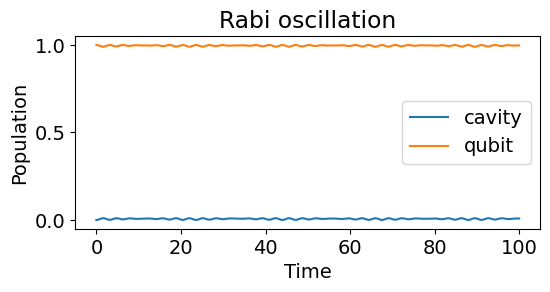

In [55]:
plt.plot(tlist, result.expect[0], label="cavity")
plt.plot(tlist, result.expect[1], label="qubit")
plt.xlabel("Time")
plt.ylabel("Population")
plt.title("Rabi oscillation")
plt.legend()
plt.show()

### Task 1.2 The ultra-strong coupling regime.

- Compute the ground state of the Hamiltonian for different $g$ and trace out the qubit. Tip: Search for `groundstate` in the documentation https://qutip.org/docs/latest/index.html.
- Plot the Wigner function for different coupling strength $g$. What do you see when $g$ is small (e.g. `g=0.1`)? What do you see when $g$ is large (e.g. `g=2.`)?
    - Hint: You will see some of the plots in the previous sections.
- What happens if you reduce the truncation level of the resonator `num_level=5`?
- The Hamiltonian can be simplified under the rotating wave approximation
$
H=ω_ca^†a+\frac{1}{2}ω_aσ_z+g(a^†σ^−+aσ^+)
$.
Do you observe the same for the Hamiltonian in RWA?

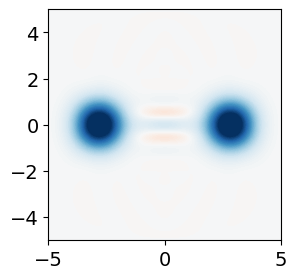

In [49]:
wc = 1.0 # cavity frequency
wa = -1.0 # qubit/atom frenqency
g = 2.  # coupling strength

# Deifne the Hamiltonian below.
H = qeye([num_level, 2])

gnd_energy, gnd_state = H.groundstate() # Compute the ground state.
gnd_state = gnd_state.ptrace(0) # Partial trace and keep the 0th subsystem.
xvec = np.linspace(-5,5,200)
W_coherent = qutip.wigner(gnd_state, xvec, xvec)
fig, axes = plt.subplots(1, 1, figsize=(3,3))
axes.contourf(xvec, xvec, W_coherent, 100, norm=matplotlib.colors.Normalize(-.125,.125), cmap=plt.get_cmap('RdBu'));

Extending reading: https://nbviewer.ipython.org/github/jrjohansson/qutip-lectures/blob/master/Lecture-3B-Jaynes-Cumming-model-with-ultrastrong-coupling.ipynb